# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [175]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, acf


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [28]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [29]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [30]:
# Your code here:
checking_nulls = sensor.loc[:,sensor.isnull().any()]
checking_nulls2 = sensor.info()
print (checking_nulls)
print(checking_nulls2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34

How many rows and columns are in our data?

In [31]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [16]:
# Your code here:

In [32]:
dates = pd.date_range("1/1/2018", periods=1751, freq="S")

In [33]:
freq = pd.infer_freq(dates)

In [34]:
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [38]:
# Your code here:
sensor.set_index(dates, drop=True, inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [91]:
dec = seasonal_decompose(sensor['userAcceleration.x'], model="additive",period = 60)

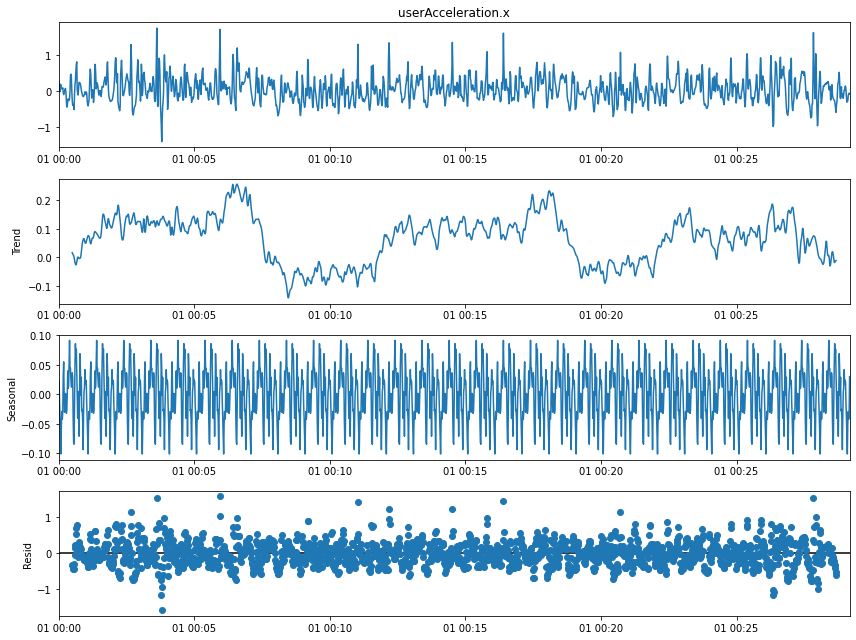

In [186]:
plt.rc("figure",figsize=(12,9))
dec.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

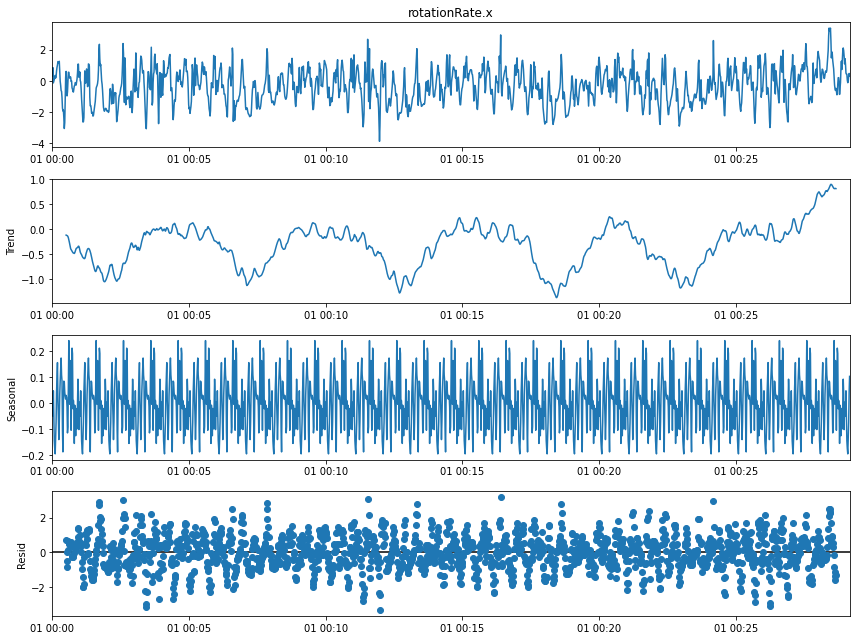

In [180]:
dec2 = seasonal_decompose(sensor['rotationRate.x'], model="additive",period = 60)
plt.rc("figure",figsize=(12,9))
dec2.plot();

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

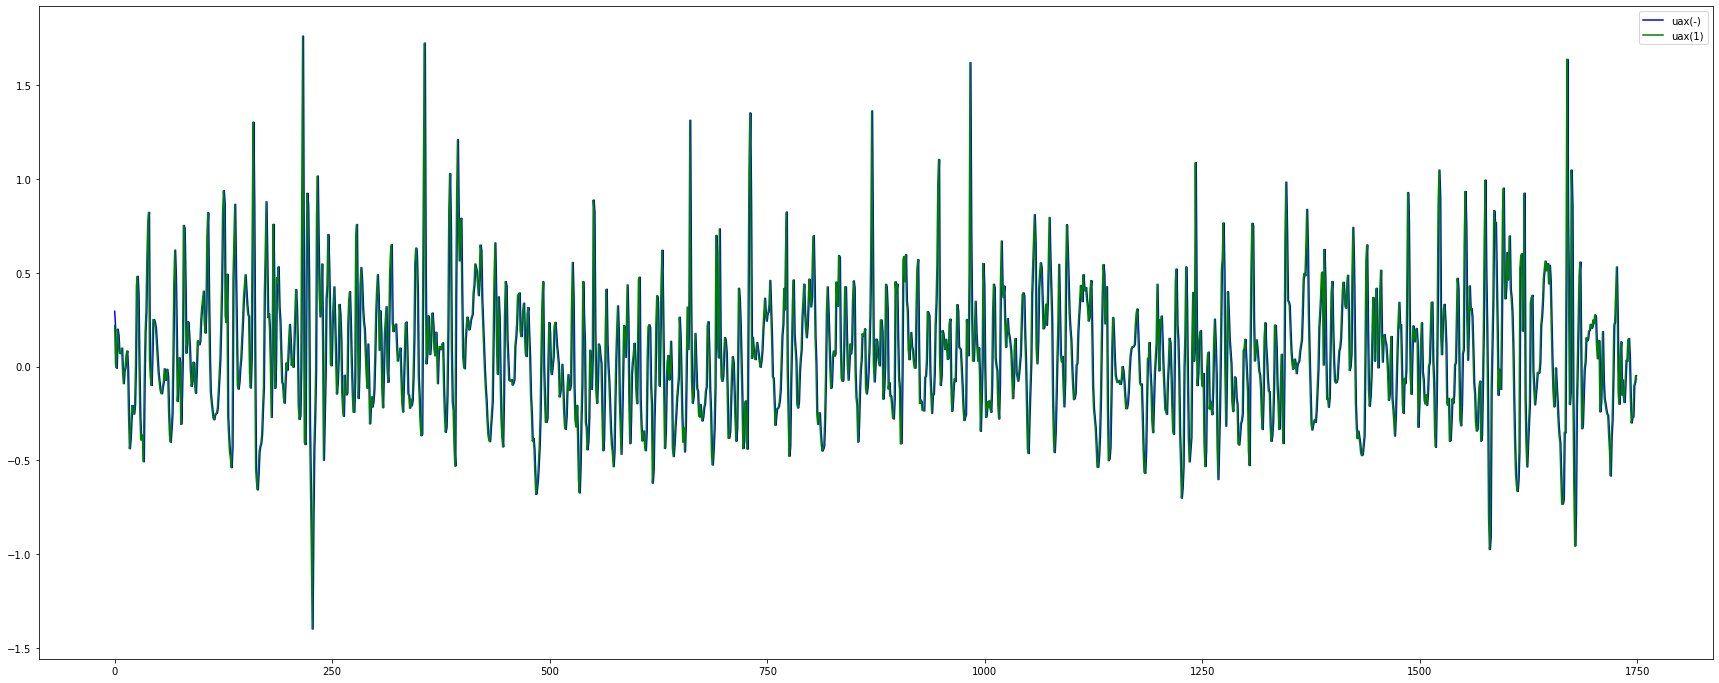

In [148]:
uax = sensor['userAcceleration.x'][:-1]
uax_lag = sensor['userAcceleration.x'][1:]
fig, ax = plt.subplots(1,1, figsize=(30, 12))
plt.plot(uax.values, label = "uax(-)", color = "blue")
plt.plot(uax_lag.values, label = "uax(1)", color = "green")
plt.legend()

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(uax.values,uax_lag)
plt.xlabel("userAcceleration.x ()",size = 14)
plt.ylabel("userAcceleration.x (+1 second)", size = 14)

In [131]:
np.corrcoef(uax, uax_lag)

array([[1.        , 0.75970362],
       [0.75970362, 1.        ]])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

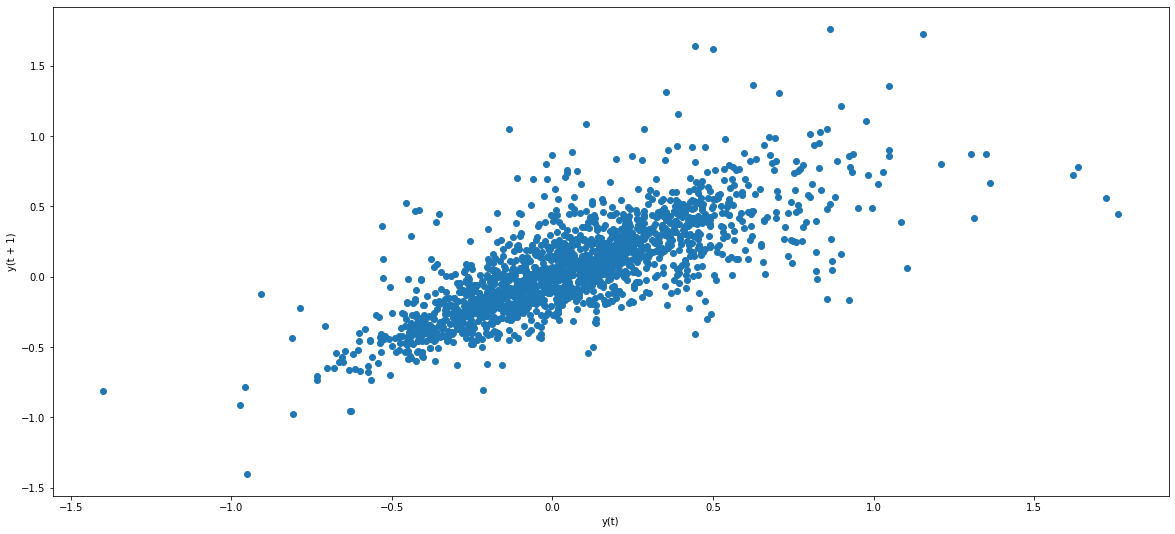

In [150]:
from pandas.plotting import lag_plot
plt.figure(figsize=(20,9))
lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

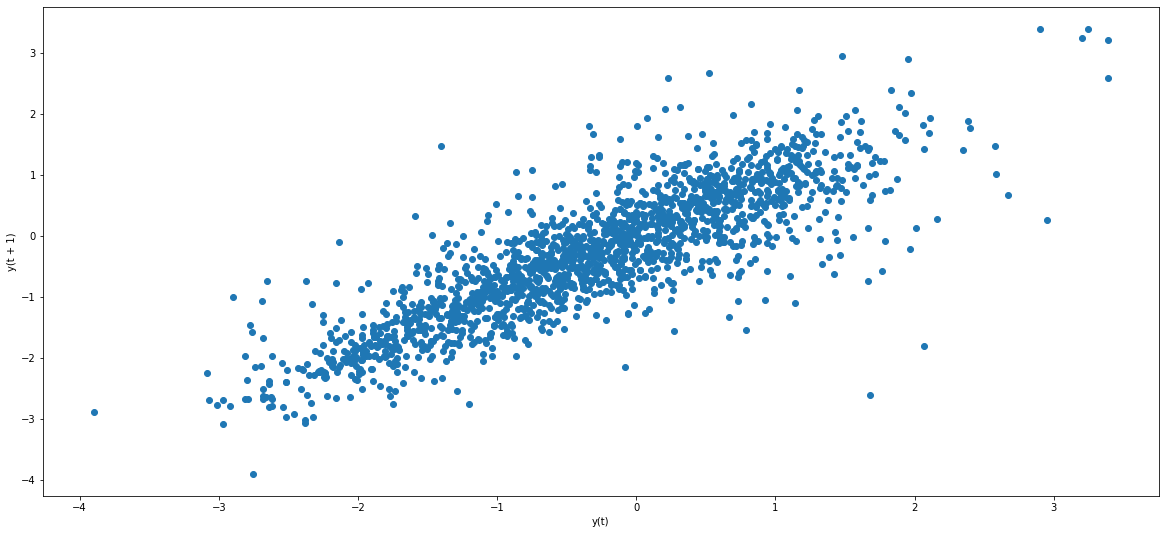

In [157]:
plt.figure(figsize=(20,9))
lag_plot(sensor['rotationRate.x'])

In [ ]:
rrx = sensor['rotationRate.x'][:-1]
rrx_lag = sensor['rotationRate.x'][1:]

plt.figure(figsize=(20, 12))

plt.scatter(rrx.values,rrx_lag)
plt.legend()
plt.xlabel("rotationRate.x ()",size = 20)
plt.ylabel("rotationRate.x (+1 second)", size = 20)

What are your conclusions from both visualizations?

In [187]:
# Autocorrelation values are very close to zero.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

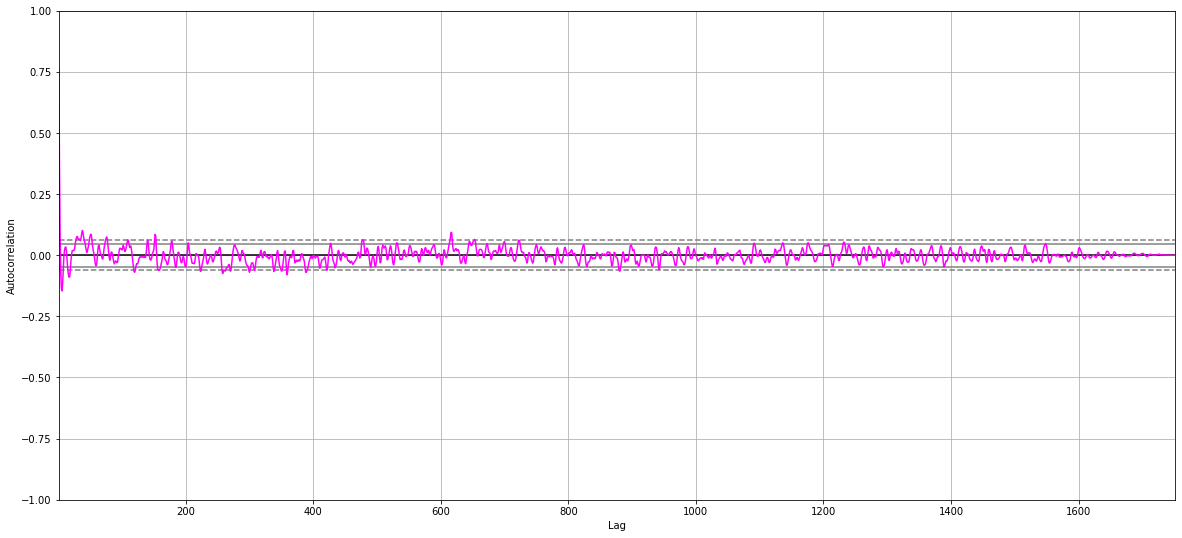

In [188]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,9))
autocorrelation_plot(sensor['userAcceleration.x'],color="magenta")


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

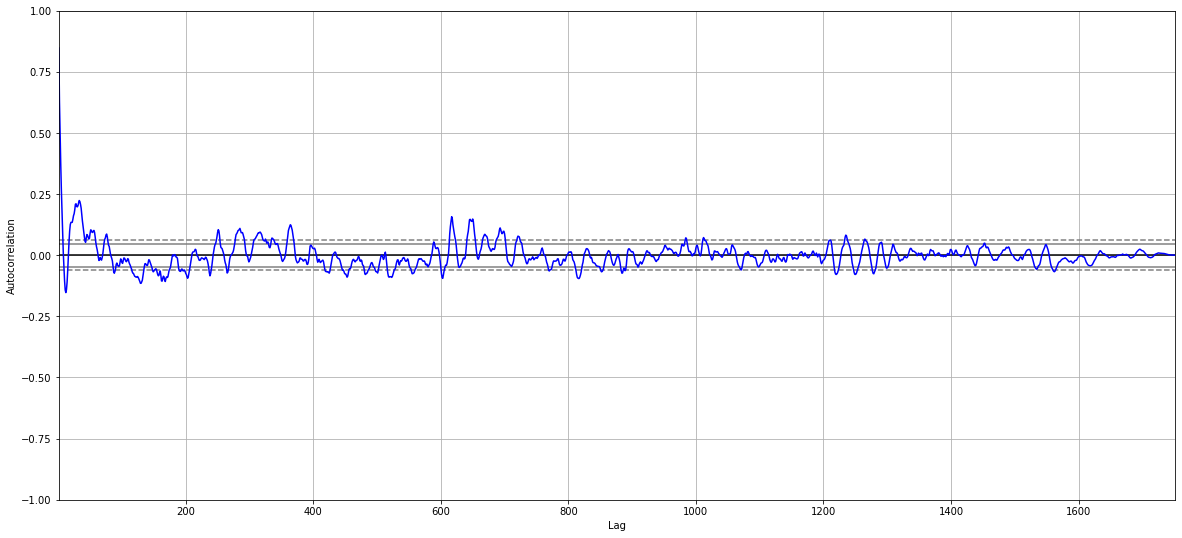

In [189]:
plt.figure(figsize=(20,9))
autocorrelation_plot(sensor['rotationRate.x'],color="blue")

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [216]:
from statsmodels.tsa.stattools import adfuller
# Ho: userAcceleration.x is not stationary
# Ha: userAcceleration.x is stationary

In [214]:
uax_adf = adfuller(sensor["userAcceleration.x"])
adf, pvalue, usedlag, nobs, critical_values, icbest = uax_adf
print("adf is: ",adf)
print("pvalue is; ",pvalue)
print("critical_values are: ",list(critical_values.values()))


adf is:  -17.957994086169762
pvalue is;  2.823439483037483e-30
critical_values are:  [-3.434100824760071, -2.863196780129223, -2.5676520210882936]


In [215]:
rrx_adf = adfuller(sensor["rotationRate.x"])
[adf, pvalue, usedlag, nobs, critical_values, icbest] = rrx_adf
print("adf is: ",adf)
print("pvalue is; ",pvalue)
print("critical_values are: ",list(critical_values.values()))

adf is:  -5.269860625086419
pvalue is;  6.320230335912299e-06
critical_values are:  [-3.4341465551936534, -2.863216966926812, -2.567662770090317]


What are your conclusions from this test?

**Conclusions for both variables are:**

    - adf < critical_values ---> Ho is rejected stationary data
    - pvalue < 0.05, Ho is rejected

**The series is stationary**